<a href="https://colab.research.google.com/github/fathanick/Machine-Learning-Deep-Learning-Fundamental/blob/master/2_TensorFlow_%26_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Framework Introduction (TensorFlow & Keras)

Pada dasarnya untuk melakukan training pada neural network, kita melakukan proses pada diagram dibawah ini secara terus menerus hingga loss atau error yang didapatkan memiliki nilai yang relatif kecil.

![alt text](https://miro.medium.com/max/894/1*bsjmNlxtISCrsYg1Jy7X3g.jpeg)

Namun, jika masalah yang akan kita selesaikan itu adalah permasalahan yang sangat kompleks, atau mungkin kita membutuhkan arsitektur yang unik dan kompleks, atau kita membutuhkan processing unit yang handal untuk mempercepat proses training data, seperti menggunakan GPU. 

Semua hal diatas dapat diatasi dengan menggunakan sebuah framework. Sama halnya seperti semua framework, deep learning framework ada untuk memudahkan kita untuk menyelesaikan masalah menggunakan deep learning.

Sebenarnya ada banyak sekali framework untuk deep learning. 
Contoh Google mempunyai TensorFlow, Facebook dengan Caffe2, Microsoft dengan CNTK dan masih banyak lagi framework lain seperti Theano dan PyTorch. Kali ini yang akan kita coba sama-sama yaitu TensorFlow (TF).

# Keras

TensorFlow sebenarnya sudah cukup jelas cara penggunaannya, tapi kadang dalam riset seringkali dibutuhkan untuk mencoba arsitektur lain, mencari optimizer yang paling cepat dan bagus, tweaking hyperparameter, dll. Sehingga dibutuhkan package tambahan, seperti **Keras**.

Keras sebenarnya adalah wrapper dari TensorFlow untuk lebih memudahkan pengguna dalam mengolah data dengan Deep Learning. Selain TensorFlow, Keras juga dapat digunakan untuk framework Theano dan CNTK.

![alt text](https://miro.medium.com/max/500/1*VqUWF8HP-v2Z4myobSBcSA.png)


# Non Linier Regression dengan framework Tensor Flow dan Keras

Misal akan dilakukan regresi terhadap sebuah fungsi non-linear seperti berikut:

![alt text](https://miro.medium.com/max/287/1*w-qEWrqSw6REdmrE6_d1wQ.jpeg)

kita akan membuat data dengan menggunakan numpy. Input datanya dari rentang -20 sampai 20 dengan step 0.25. Kita juga buat targetnya sesuai dengan persamaan diatas.

In [0]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.optimizers import SGD

# Generate data from -20, -19.75, -19.5, .... , 20
train_x = np.arange(-20, 20, 0.25)

# Calculate Target : sqrt(2x^2 + 1)
train_y = np.sqrt((2*train_x**2)+1)

Using TensorFlow backend.


Sedangkan arsitektur neural networknya terdiri dari:
*   1 node pada input layer
*   8 node pada Hidden Layer 1 dengan ReLU activation
*   4 node pada Hidden Layer 2 dengan ReLU activation
*   1 Output node dengan Linear activation

Di sini optimizer yang akan kita gunakan adalah SGD dan Mean Squared Error (MSE) sebagai loss functionnya. 
Sebelum kita bisa melakukan training, kita harus meng-”compile” model kita terlebih dahulu.


In [0]:
# Create Network
inputs = Input(shape=(1,))
h_layer = Dense(8, activation='relu')(inputs)
h_layer = Dense(4, activation='relu')(h_layer)
outputs = Dense(1, activation='linear')(h_layer)
model = Model(inputs=inputs, outputs=outputs)

# Optimizer / Update Rule
sgd = SGD(lr=0.001)
# Compile the model with Mean Squared Error Loss
model.compile(optimizer=sgd, loss='mse')

W1110 03:13:18.567272 140483142891392 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 03:13:18.580785 140483142891392 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 03:13:18.590420 140483142891392 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 03:13:18.638962 140483142891392 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Setelah model siap, akan dilakukan data training berdasarkan input yang telah dimasukkan. Untuk melakukan training, kita harus memanggil method fit. Pada method ini ada param batch_size dengan nilai 20 yang artinya kita gunakan mini-batch SGD.

Kita akan lakukan ini hingga 10000 epoch dan menyimpan semua parameter (weights dan bias) kedalam sebuah file.
Epoch, learning rate, batch_size, dll ini adalah hyperparameter yang bisa kita tentukan. Setelah epochs 1000, berapakah MSE yang Anda peroleh?

In [0]:
# Train the network and save the weights after training
model.fit(train_x, train_y, batch_size=20, epochs=1000, verbose=1)
model.save_weights('weights.h5')

Epoch 1/1000
160/160 [==============================] - 0s 117us/step - loss: 0.0040
Epoch 2/1000
160/160 [==============================] - 0s 75us/step - loss: 0.0047
Epoch 3/1000
160/160 [==============================] - 0s 77us/step - loss: 0.0057
Epoch 4/1000
160/160 [==============================] - 0s 68us/step - loss: 0.0060
Epoch 5/1000
160/160 [==============================] - 0s 70us/step - loss: 0.0075
Epoch 6/1000
160/160 [==============================] - 0s 70us/step - loss: 0.0057
Epoch 7/1000
160/160 [==============================] - 0s 61us/step - loss: 0.0057
Epoch 8/1000
160/160 [==============================] - 0s 75us/step - loss: 0.0057
Epoch 9/1000
160/160 [==============================] - 0s 78us/step - loss: 0.0038
Epoch 10/1000
160/160 [==============================] - 0s 76us/step - loss: 0.0038
Epoch 11/1000
160/160 [==============================] - 0s 81us/step - loss: 0.0083
Epoch 12/1000
160/160 [==============================] - 0s 63us/step - l

Selanjutnya, kita akan lakukan prediksi terhadap angka lain diluar training data yaitu 26 dan akan membandingkan hasil prediksi seluruh training data dengan target.

Kita bisa gunakan matplotlib untuk membuat dua grafik dan melihat perbandingannya. Line merah untuk target dan line biru untuk hasil prediksi.

('f(26) = ', array([[27.86055]], dtype=float32))


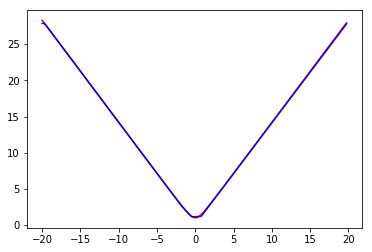

In [0]:
# Predict training data
predict = model.predict(np.array([26]))
print('f(26) = ', predict)

predict_y = model.predict(train_x)

# Draw target vs prediction
plt.plot(train_x, train_y, 'r')
plt.plot(train_x, predict_y, 'b')
plt.show()

Berapakah nilai hasil prediksi yang Anda peroleh? coba bandingkan dengan perhitungan manual!

Sedangkan grafik prediction vs target untuk semua training data dapat dilihat sangat identik sekali.

### Referensi

https://medium.com/@samuelsena/pengenalan-deep-learning-part-4-deep-learning-framework-introduction-tensorflow-keras-b8f00b146f06